# Fifth assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 2.1) and 2.2). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: June 07, 2022, 23:55 hrs

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

You will examine 4 small data sets. Each of them contains only one predictor and one target. First the data will be loaded.

In [5]:
data = pd.read_csv('ass05_data.csv')
data.head()

,x0,x1,x2,x3,y0,y1,y2,y3
0,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
1,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
2,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
3,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
4,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47


Johannes Daten claims to already have a very versatile model that can predict the respective target y very well for all 4 datasets. 

**Task 1.1**


Use the python module *pickle* to load the model <font color='blue'>**model.sav**</font>. Use the variable `model` to store the loaded estimator.

In [6]:
import pickle
# YOUR CODE HERE
#%pip install scikit-learn==1.1.1
filename = 'model.sav'
model = pickle.load(open( filename,'rb'))



Now we will use the scorers that we already built in last assignment:

In [7]:
def root_mean_squared_error(y, y_pred):
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse
def r_pearson(y, y_pred):
    from scipy.stats import pearsonr 
    rp, _ = pearsonr(y, y_pred)
    return rp
rmse_scorer = make_scorer(root_mean_squared_error)
rp_scorer = make_scorer(r_pearson)

**Task 1.2**


Now test with the 4 data sets what the model is good for. In the variable metrics there are already 4 metric functions which you should use. Calculate your predictions with the help of the loaded model and the corresponding predictor *x0,x1,x2,x3*. Apply the metrics for your respective predictions and the target *y0,y1,y2,y3*. Append the respective result to the list `metlist`. Follow the order according to the given table - then a dataframe will be constructed and a plot will be generated for you. 


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


[]

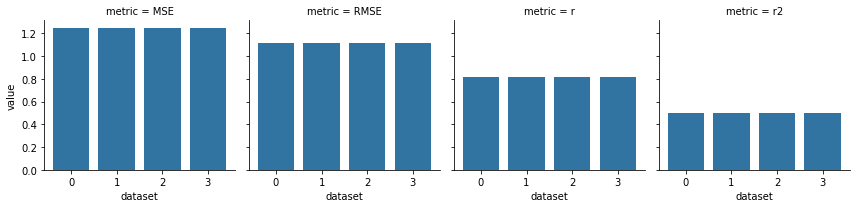

In [8]:
metrics = [mean_squared_error, root_mean_squared_error, r_pearson, r2_score]
metlist = []
for met in metrics:
    # YOUR CODE HERE
    y0_pred = model.predict(data.x0.to_numpy().reshape(-1,1))
    y1_pred = model.predict(data.x1.to_numpy().reshape(-1,1))
    y2_pred = model.predict(data.x2.to_numpy().reshape(-1,1))
    y3_pred = model.predict(data.x3.to_numpy().reshape(-1,1))
    
    y0 = data.y0
    y1 = data.y1
    y2 = data.y2
    y3 = data.y3


    metlist.append(met(y0_pred,y0))            
    metlist.append(met(y1_pred,y1))                                    
    metlist.append(met(y2_pred,y2))    
    metlist.append(met(y3_pred,y3))
                   
metdf = pd.DataFrame({'dataset': 4*[0,1,2,3],'model': 16*['JD'],'metric': 4*['MSE']+4*['RMSE']+4*['r']+4*['r2'], 'value': metlist})

g = sns.FacetGrid(data=metdf, col='metric')
g.map(sns.barplot, 'dataset', 'value')
plt.plot()

You suggest to Johannes Daten that he is into dusty old models. You decide to fit a neural network for each data set.

**Task 1.3**

You are given a for-loop and the list `mlps`. At first, we fit a `StandardScaler` `stsc` to all of the `X` data. Now, create and fit a scikit-learn- `MLPRegressor()` within the for loop (do not create the `MLPRegressor()` outside) on each of the 4 datasets (i.e. (x0,y0), (x1,y1) and so on). Use the `stsc` to transform the `x` data in each loop before fitting the model. Append each **fitted** estimator to the list mlps. Use 3 hidden layers with 128, 64 and 32 neurons. Set the parameters `max_iter=100000` and `n_iter_no_change=1000`. Use the random state 42. 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
stsc.fit(pd.concat([data.x0, data.x1, data.x2, data.x3]).array.reshape(-1, 1))

mlps = []
for m in range(0,4):
    # YOUR CODE HERE
    x = data.iloc[:,m].to_numpy().reshape(-1,1)
    x_scaled = stsc.transform(x)
    
    y = data.iloc[:,m+4]
    regr = MLPRegressor(hidden_layer_sizes=(128,64,32),max_iter=100000,n_iter_no_change=1000,random_state=42).fit(x,y)
    regr.fit(x_scaled,y)
    mlps.append(regr)

Looking at all 4 data sets, we see that all 4 predictors are in the range between 3 and 20. 

**Task 1.4**


Create a variable `x` with 100 values ranging from 3 to 20. The 3 and 20 should be included. Predict the y-values to these x-values with the model `mlps[0]` and the model `model`. Remember, that for the prediction of the MLP you have to apply the `StandardScaler` on your x values again. Store your predictions in the variables `y_mlp0` and `y_jd`. A plot will be generated for you.

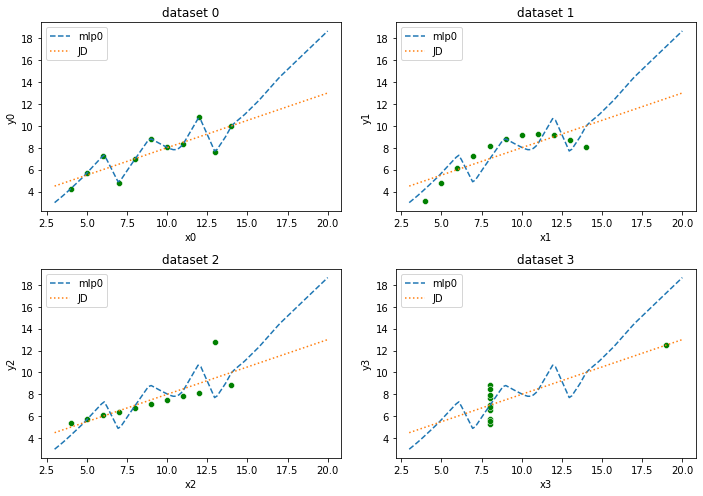

In [11]:
# YOUR CODE HERE
x = np.linspace(3,20,100)
x_scaled = stsc.transform(x.reshape(-1, 1))
y_mlp0 = mlps[0].predict(x_scaled)
y_jd = model.predict(x.reshape(-1, 1))

f,a = plt.subplots(2,2, figsize=(10,7))
a = a.ravel()
for p in range(0,4):
    sns.lineplot(x=x,y=y_mlp0,ax=a[p],label='mlp0', linestyle='--')
    sns.lineplot(x=x,y=y_jd,ax=a[p],label='JD',linestyle=':')
    sns.scatterplot(x=data.iloc[:,p],y=data.iloc[:,4+p],ax=a[p], color='g')
    a[p].set_title('dataset ' + str(p))
plt.tight_layout()

![metrics](metrics.svg)

**Tasl 1.5**

Given the plots from task 1.4 and the visualization of the 4 metrics for some of the models (if you are also interested in the performance of the MLP fitted on dataset 2 and dataset 3 - go ahead in an own notebook and try it ... but not in this assignment.) which of the following statements is correct?

'a': `mlp[0]` and `mlp[1]` are overfitted.

'b': Johannes Daten's `model` is overfitted.

'c': Neural Networks are robust against overfitting.

'd': Overfitting is not as bad as underfitting, since only underfitting generates models with over-optimistic performance predictions.

*Use a variable* `x15` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x15='e'`. *There is only one correct answer.*

In [12]:
# YOUR CODE HERE
x15='a'
print('The answer is ' + x15 + '.')

The answer is a.


The previous models were more or less evaluated only on the training set. You already know that the error on the training set is not a reliable value for the performance of the model on unseen data. With such small data sets it is hard to justify a train-test split. Therefore, you decide to do a Leave One Out Cross-Validation (LOOCV).

**Task 2.1**

Write a for loop from 0 to incl 3 and by doing so perform a Leave-One-Out-Cross-Validation for each of the four datasets. Use the `cross_validate()` function. Use a `LinearRegression()` as estimator and the `rmse_scorer` for the scoring. Print the mean and standard deviation of the test score in each iteration of the for-loop and append each cross_validate object to the list `crval`!


In [14]:
crval=[]
# YOUR CODE HERE
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut

for m in range(0,4):
    # YOUR CODE HERE
    
    x_m = data.iloc[:,m].array.reshape(-1,1)
    y_m = data.iloc[:,m+4]
    lr = linear_model.LinearRegression()
    cv = LeaveOneOut()
    c_v = cross_validate(lr, x_m, y_m, cv = cv, scoring = rmse_scorer, return_train_score=True, return_estimator= True)
 
    print(f"iteration {m}")
    mean = np.mean(c_v['test_score'])
    print(f'mean: {mean}')
    std = np.std(c_v['test_score'])
    print(f'standard deviation: {std}')
    
    crval.append(c_v)

iteration 0
mean: 1.0254701043905585
standard deviation: 0.9051256258116829
iteration 1
mean: 1.2316219563265016
standard deviation: 0.8290285839560574
iteration 2
mean: 0.9184023615273613
standard deviation: 1.1418863494166223
iteration 3
mean: 1.502939393939394
standard deviation: 1.4256718670231174


![cv](cv.svg)

**Task 2.2**

Given the mean and standard deviation of the test errors in the LOOCV and the plots of the coefficients and intercepts. Which of the following statements is correct?

'a': A linear regression with a coefficent of 0.5 and an intercept of 3 predicts all 4 datasets quite good..

'b': Outliers in a dataset are problematic only if they are in the test set.

'c': Models leading to similar performance metrics can have different characteristics.

'd': LOOCV should not be used for small datasets.

*Use a variable* `x22` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x22='e'`. *There is only one correct answer.*

In [15]:
# YOUR CODE HERE
x22='c'
print('The answer is ' + x22 + '.')

The answer is c.
